In [1]:
import os
import json
import parse
import fasttext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.metrics import f1_score
datadir = "/home/peterr/macocu/task5_webgenres/data/final/fasttext2"

dev_dd = os.path.join(datadir, "dev_onlyprimary_True_dedup_True.fasttext")
test_dd = os.path.join(datadir, "test_onlyprimary_True_dedup_True.fasttext")
train_dd = os.path.join(datadir, "train_onlyprimary_True_dedup_True.fasttext")


for filename in [ train_dd,  test_dd,  dev_dd]:
    try:
        _ = parse_fasttext_file(filename)
    except Exception as e:
        raise e

import pandas as pd

results = list()


dev_dd_df = parse_fasttext_file(dev_dd)
test_dd_df = parse_fasttext_file(test_dd)
train_dd_df = parse_fasttext_file(train_dd)

minitrain_df = train_dd_df.sample(frac=0.66666, random_state=42)


Original training, with dev added to train:

In [ ]:
for i in range(5):
    print("run: ", i)

    traindev = pd.concat([dev_dd_df, train_dd_df], ignore_index=True)

    model = train_model(traindev)

    rundict = eval_model(test_dd_df, model)
    rundict["train"] = "traindev_dd"
    rundict["eval"] = "test_dd"

    results.append(rundict)

import json
with open("backup_20.txt", "w") as f:
    json.dump(results, f)

Other way: removing data from train:

In [2]:
for i in range(5):
    print("run: ", i)

    model = train_model(minitrain_df)

    rundict = eval_model(test_dd_df, model)
    rundict["train"] = "minitrain_dd"
    rundict["eval"] = "test_dd"

    results.append(rundict)

import json
with open("backup_20_2.txt", "w") as f:
    json.dump(results, f)

run:  0


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 

run:  1


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 

run:  2


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 

run:  3


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 

run:  4


Some weights of the model checkpoint at EMBEDDIA/sloberta were not used when initializing CamembertForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 

In [2]:
from utils import read_record
import pandas as pd

df = pd.concat(
    [read_record(file) for file in [
    "backup_17.txt",
    "backup_17__2.txt",
    "backup_18.txt",
    "backup_18_2.txt",
    "backup_20.txt",
    "backup_20_2.txt"
]

], ignore_index=True)

c_dd = df["eval"] == "test_dd"
c_train_dd = df.train == "dd"
c_traindev_dd = df.train == "traindev_dd"



only_train = c_dd & c_train_dd
train_dev = c_traindev_dd & c_dd

df["scenario"] = ""

df.loc[only_train, "scenario"] = "train only"
df.loc[train_dev, "scenario"] = "train + dev"

print(df[df.scenario!=""].groupby("scenario").agg("mean,std".split(",")).to_markdown())

| scenario    |   ('microF1', 'mean') |   ('microF1', 'std') |   ('macroF1', 'mean') |   ('macroF1', 'std') |
|:------------|----------------------:|---------------------:|----------------------:|---------------------:|
| train + dev |              0.631472 |           0.00578769 |              0.60827  |            0.0185148 |
| train only  |              0.630365 |           0.0175576  |              0.593252 |            0.0280028 |


In [30]:
for col in ["microF1", "macroF1"]:

    from scipy import stats
    #Candidate:
    higher = df.loc[df.scenario == "train + dev", col].values
    #Alternative
    lower = df.loc[df.scenario == "train only", col].values

    # print(f"Wilcoxon p value: {stats.wilcoxon(higher,lower, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")
    print("Evaluating ", col, ", presuming more data is better.")
    print(f"MannWhithey p value: {stats.mannwhitneyu(higher,lower, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")

    print(f"Student p value: {stats.ttest_ind(higher,lower)[1]:0.3}", "\t\t(null hypothesis: samples have identical average, equal variance is assumed but not necessary)")
    import numpy as np
    print(f"Higher average: {np.mean(higher):0.4}, lower average: {np.mean(lower):0.4}")
    print("\n\n")

Evaluating  microF1 , presuming more data is better.
MannWhithey p value: 0.613 		(alternative hypothesis: first is greater than the second)
Student p value: 0.894 		(null hypothesis: samples have identical average, equal variance is assumed but not necessary)
Higher average: 0.6315, lower average: 0.6304



Evaluating  macroF1 , presuming more data is better.
MannWhithey p value: 0.087 		(alternative hypothesis: first is greater than the second)
Student p value: 0.296 		(null hypothesis: samples have identical average, equal variance is assumed but not necessary)
Higher average: 0.6083, lower average: 0.5933





In [1]:
c = df.scenario == "train + dev"

y_true = np.array([i for i in df[c].y_true.values]).reshape(-1)
y_pred = np.array([i for i in df[c].y_pred.values]).reshape(-1)

from utils import NUM_TO_STR
y_true = [NUM_TO_STR[i] for i in y_true]
y_pred = [NUM_TO_STR[i] for i in y_pred]

from utils import plot_cm, train_labels

plot_cm(y_true, y_pred, save="images/20_traindev_all_cm.png",
title="Cumulative CM for train dd + dev dd, test dd")

NameError: name 'df' is not defined

In [2]:
c = df.scenario == "train only"

y_true = np.array([i for i in df[c & df.y_true.notna()].y_true.values]).reshape(-1)
y_pred = np.array([i for i in df[c& df.y_true.notna()].y_pred.values]).reshape(-1)

from utils import NUM_TO_STR
y_true = [NUM_TO_STR[i] for i in y_true]
y_pred = [NUM_TO_STR[i] for i in y_pred]

from utils import plot_cm, train_labels

plot_cm(y_true, y_pred, save="images/20_train_all_cm.png",
title="Cumulative CM for train dd, test dd")

NameError: name 'df' is not defined

In [16]:
c1 = df.train == "dd"
c2 = df.train == "minitrain_dd"
c3 = df.train == "traindev_dd"
c4 = df["eval"] == "test_dd"



gb = df[(c1|c2|c3)&c4].groupby("train")[["microF1", "macroF1"]].agg(["mean", "std"])
gb = gb.loc[["minitrain_dd", "dd", "traindev_dd"], :]
gb

microF1        macroF1       
                mean    std    mean    std
train                                     
minitrain_dd   0.615  0.012   0.510  0.028
dd             0.630  0.018   0.593  0.028
traindev_dd    0.631  0.006   0.608  0.019

In [17]:
train_fraction = [0.4, 0.6, 0.8]
mimean = gb["microF1"]["mean"].values
mistd = gb["microF1"]["std"].values

mamean = gb["macroF1"]["mean"].values
mastd = gb["macroF1"]["std"].values

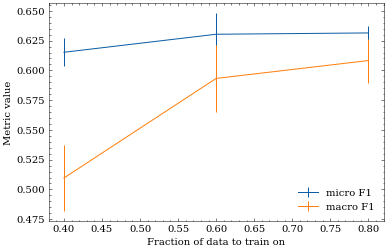

In [26]:
with plt.style.context(["science", "no-latex"]):
    plt.figure(figsize=(6, 4))
    plt.errorbar(train_fraction, mimean, yerr=mistd, label="micro F1")
    plt.errorbar(train_fraction, mamean, yerr=mastd, label="macro F1", color="tab:orange")

    plt.xlabel("Fraction of data to train on")
    plt.ylabel("Metric value")
    plt.legend(loc="lower right")
    plt.savefig("images/20_effect_of_training_split_size.png")
    plt.show()